In [1]:
from visual_behavior import utilities as vbu
import visual_behavior.plotting as vbp
from visual_behavior.utilities import EyeTrackingData
from visual_behavior import database as db
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import time
import seaborn as sns
import matplotlib.patches as patches

from scipy import stats

from multiprocessing import Pool

from dro.modules import eye_tracking as et
from dro.modules import plotting as plot_utils

In [2]:
%matplotlib notebook
%widescreen

In [3]:
osid = 939868908
ed = et.open_eye_data(osid)

on osid = 939868908


In [6]:
def has_dlc_file(osid):
    return 'EyeDlcOutputFile' in list(db.get_well_known_files(osid)['name'])

def get_raw_points_path(osid):
    wkf = db.get_well_known_files(osid).set_index('name')
    return os.path.join(wkf.loc['EyeDlcOutputFile']['storage_directory'],wkf.loc['EyeDlcOutputFile']['filename'])

def get_ellipse_fit_path(osid):
    wkf = db.get_well_known_files(osid).set_index('name')
    return os.path.join(wkf.loc['EyeTracking Ellipses']['storage_directory'],wkf.loc['EyeTracking Ellipses']['filename'])

def get_raw_points(osid):
    if has_dlc_file(osid):
        raw_points = pd.read_hdf(get_raw_points_path(osid))
    return raw_points

In [7]:
raw_points = get_raw_points(osid)
raw_points.head()

scorer    DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000  \
bodyparts                                                          cr1   
coords                                                               x   
0                                                 286.554505             
1                                                 286.543419             
2                                                 286.446967             
3                                                 286.026124             
4                                                 285.662982             

scorer                                                               \
bodyparts                                cr2                          
coords              y likelihood           x           y likelihood   
0          176.528818   0.977731  286.190393  180.664786   0.972303   
1          175.962367   0.979474  286.266818  180.290675   0.975937   
2          177.157185   0.964974  286.060585  181.076132   0.952341   
3          176.727724   0.969657  285.773840  180.699918   0.965138   
4          177.326584   0.971701  285.235032  181.529938   0.963644   

scorer                                                                \
bodyparts         cr3                                cr4               
coords              x           y likelihood           x           y   
0          282.763740  183.628458   0.966301  278.398995  185.363559   
1          284.528416  182.500771   0.964875  278.515594  184.911605   
2          282.741096  184.073106   0.933522  278.342283  185.561461   
3          282.646607  183.872939   0.931709  278.127570  185.154886   
4          282.277619  183.797223   0.953052  278.058035  185.271261   

scorer                                                               \
bodyparts                    cr5                                cr6   
coords    likelihood           x           y likelihood           x   
0           0.966746  274.929368  184.430289   0.966985  271.922385   
1           0.963974  275.098775  184.029893   0.965038  272.797941   
2           0.952352  275.191154  184.537518   0.950812  272.163179   
3           0.948959  274.371115  184.076764   0.947426  272.192720   
4           0.964642  274.695128  184.233658   0.960500  272.147128   

scorer                                                               \
bodyparts                                cr7                          
coords              y likelihood           x           y likelihood   
0          182.544456   0.957236  271.580411  178.383849   0.950192   
1          181.687323   0.952017  271.629746  178.439164   0.957417   
2          182.426768   0.952915  271.734458  179.032230   0.946953   
3          181.850998   0.951829  271.828434  178.163680   0.944745   
4          182.059609   0.957636  271.532115  178.350175   0.960330   

scorer                                                                \
bodyparts         cr8                                cr9               
coords              x           y likelihood           x           y   
0          271.846550  174.042302   0.937688  274.514905  171.259231   
1          272.657553  174.523464   0.948928  274.154034  171.769936   
2          271.838485  175.668707   0.943852  274.723429  172.407012   
3          272.027885  174.777580   0.940063  274.544431  171.906829   
4          271.918111  174.967237   0.955678  273.916300  172.332478   

scorer                                                               \
bodyparts                   cr10                               cr11   
coords    likelihood           x           y likelihood           x   
0           0.970535  278.585892  169.761060   0.974152  280.984208   
1           0.974744  278.158194  169.961014   0.978667  280.815091   
2           0.960253  278.287038  171.025813   0.970112  280.714134   
3           0.960500  278.157269  170.639862   0.970311  280.096760   
4           0.973589  277.493361  171.049638   0.

<IPython.core.display.Javascript object>


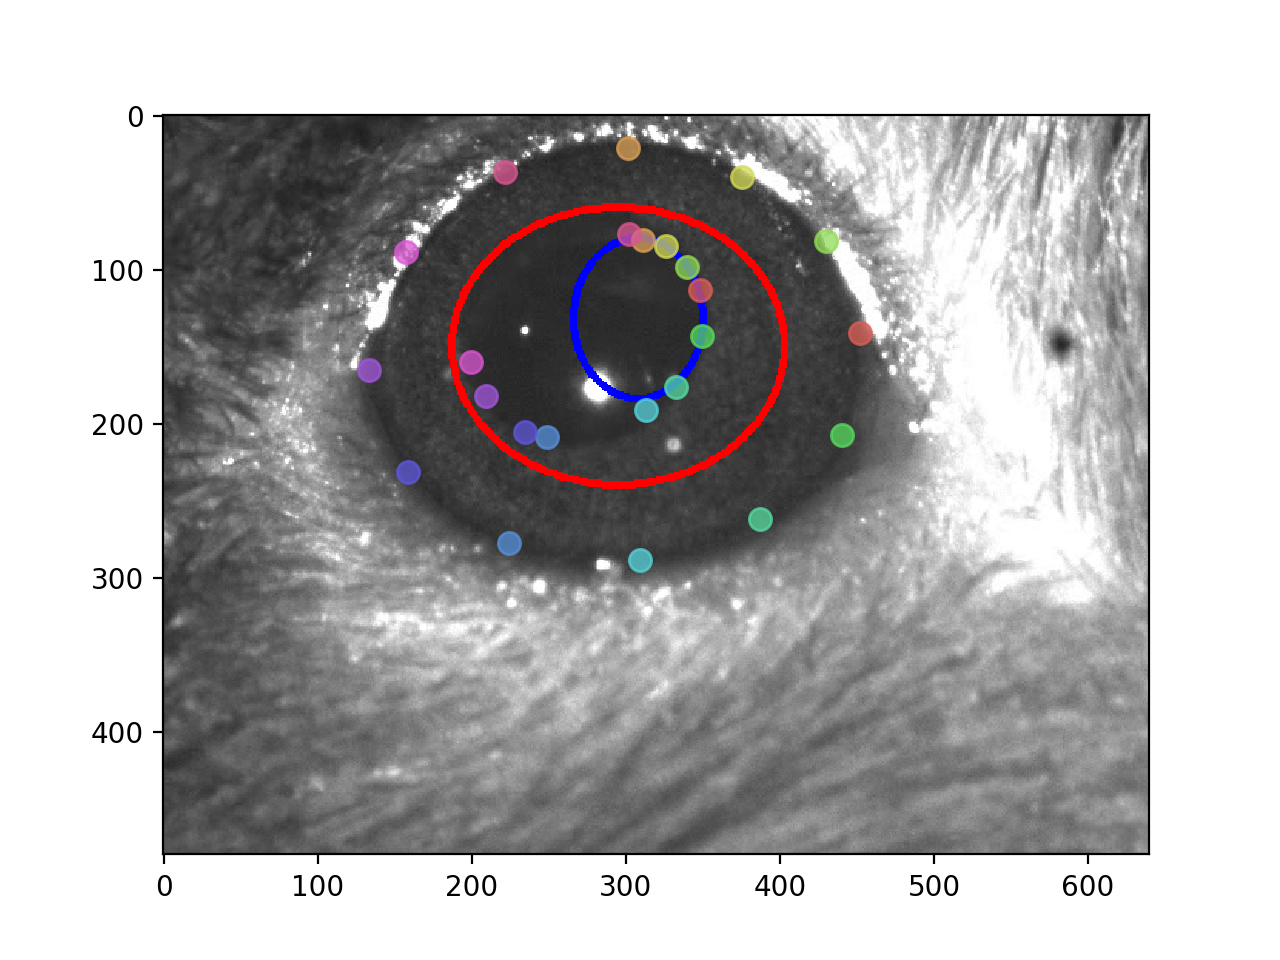

In [18]:
frame = 120765

fig,ax=plt.subplots()
ax.imshow(ed.get_annotated_frame(frame))

pupil_columns = sorted([c for c in np.unique(np.array(raw_points.columns.get_level_values(1))) if c.startswith('pupil')])
palette = sns.color_palette("hls", len(pupil_columns))
for c,pupil_column in enumerate(pupil_columns):
    dft = raw_points[raw_points.columns.get_level_values(0)[0]][pupil_column]
    ax.plot(dft.loc[frame]['x'],dft.loc[frame]['y'],marker='o',color=palette[c],alpha=0.75,markersize=8)
    
eye_columns = sorted([c for c in np.unique(np.array(raw_points.columns.get_level_values(1))) if c.startswith('eye')])
palette = sns.color_palette("hls", len(eye_columns))
for c,eye_column in enumerate(eye_columns):
    dft = raw_points[raw_points.columns.get_level_values(0)[0]][eye_column]
    ax.plot(dft.loc[frame]['x'],dft.loc[frame]['y'],marker='o',color=palette[c],alpha=0.75,markersize=8)